In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
sns.set(style='darkgrid')

In [3]:
matches = pd.read_csv(r"matches.csv", encoding='iso-8859-1')
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
deliveries = pd.read_csv("deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
#row, column
matches.shape, deliveries.shape

((1095, 20), (260920, 17))

In [6]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [8]:
matches.drop(columns = ['method'], inplace=True)

In [9]:
matches['city'].fillna('unknown', inplace = True) 
matches['winner'].fillna('no_result', inplace = True)

/tmp/ipykernel_8158/159303191.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['city'].fillna('unknown', inplace = True)
/tmp/ipykernel_8158/159303191.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [10]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [11]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

# EDA on matches Dataset

## Top 10 Winning Teams

In [12]:
top_teams = matches['winner'].value_counts().head(10)
top_teams

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Name: count, dtype: int64

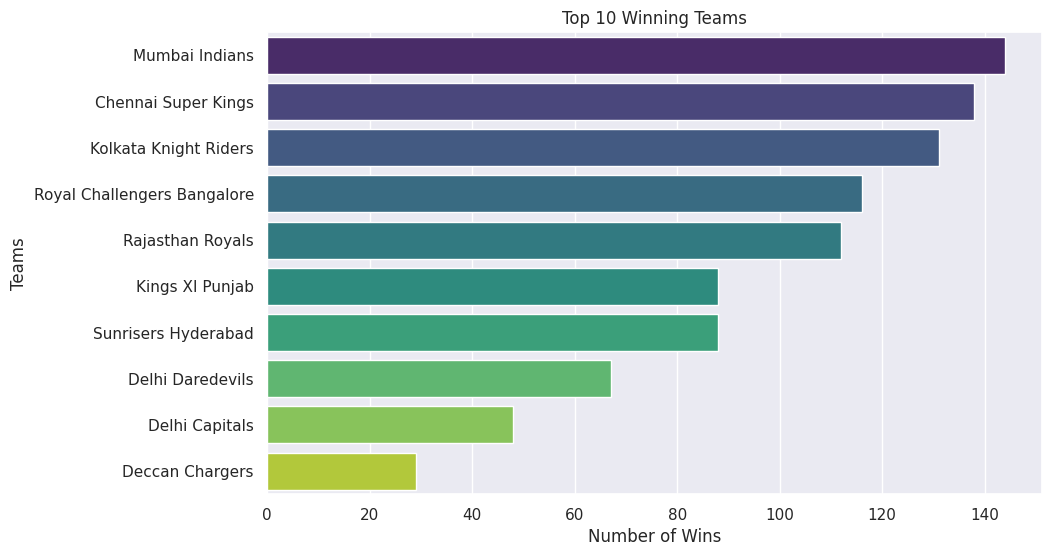

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_teams.values, y = top_teams.index, palette='viridis', hue = top_teams.index, legend=False)
plt.title('Top 10 Winning Teams')
plt.xlabel('Number of Wins')
plt.ylabel('Teams')
plt.show()

## Toss Decision Analysis

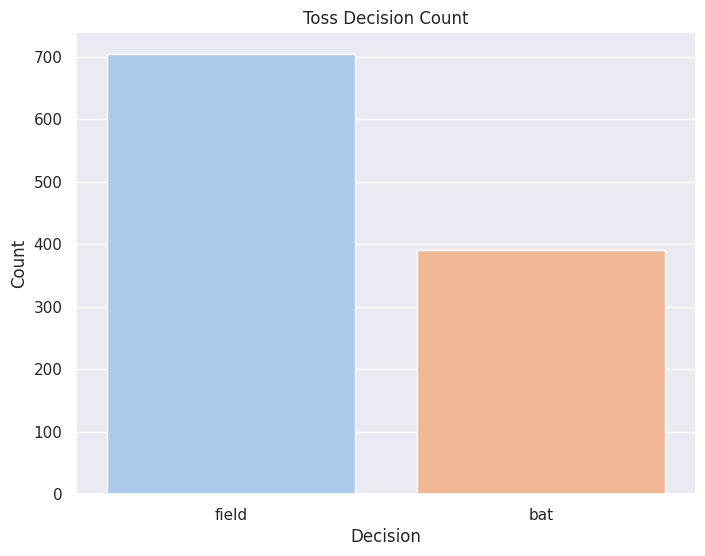

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data= matches, x = 'toss_decision',palette='pastel', hue='toss_decision', legend=False)
plt.title('Toss Decision Count')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()

## Toss Winner vs. Match Winner

In [15]:
toss_match_win = matches[matches['toss_winner'] == matches['winner']]
toss_match_win.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
8,335990,2007/08,Hyderabad,2008-04-24,League,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,215.0,20.0,N,Asad Rauf,MR Benson


In [16]:
percentage = (len(toss_match_win) / len(matches))*100
percentage

50.593607305936075

## Match Played per Season

In [17]:
season_matches = matches['season'].value_counts().sort_index()
season_matches

season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
2023       74
2024       71
Name: count, dtype: int64

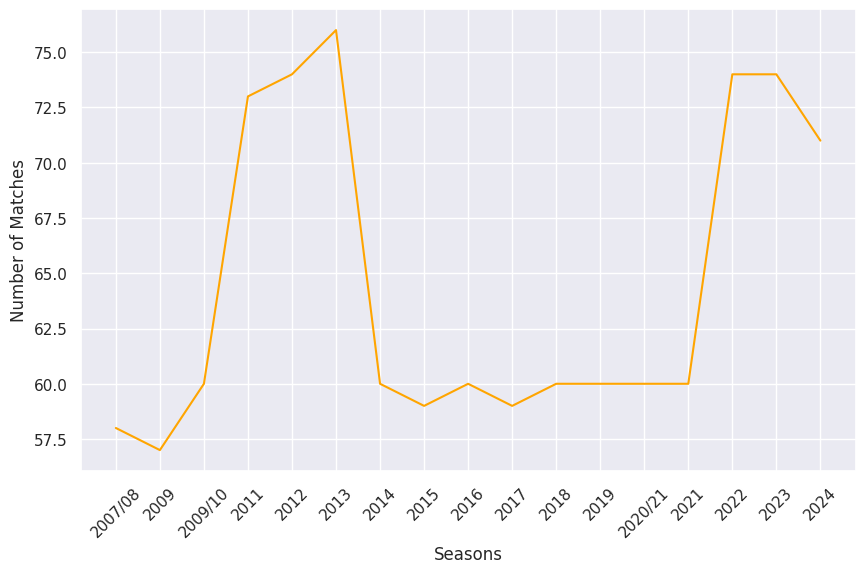

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(x =season_matches.index, y = season_matches.values, markers='o', color='orange')
plt.xlabel('Seasons')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

## City Wise Match Distribution

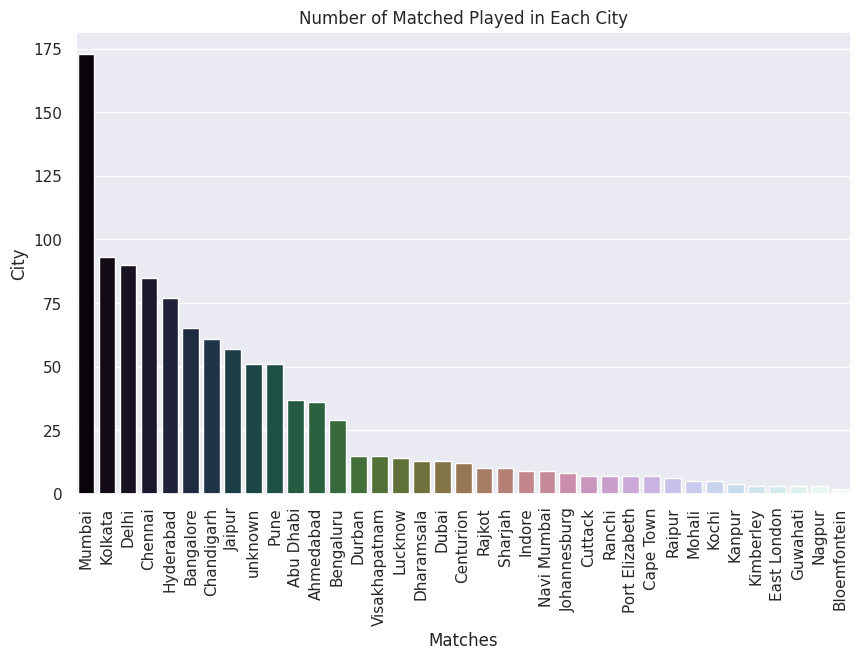

In [19]:
plt.figure(figsize=(10, 6))
city_count = matches['city'].value_counts()
sns.barplot(x=city_count.index, y = city_count.values, palette='cubehelix', hue = city_count.index, legend=False)
plt.title('Number of Matched Played in Each City')
plt.xlabel('Matches')
plt.ylabel('City')
plt.xticks(rotation= 90)
plt.show()

## Top Batsman by Total Runs

In [20]:
top_batsman = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending= False).head(10)
top_batsman

batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64

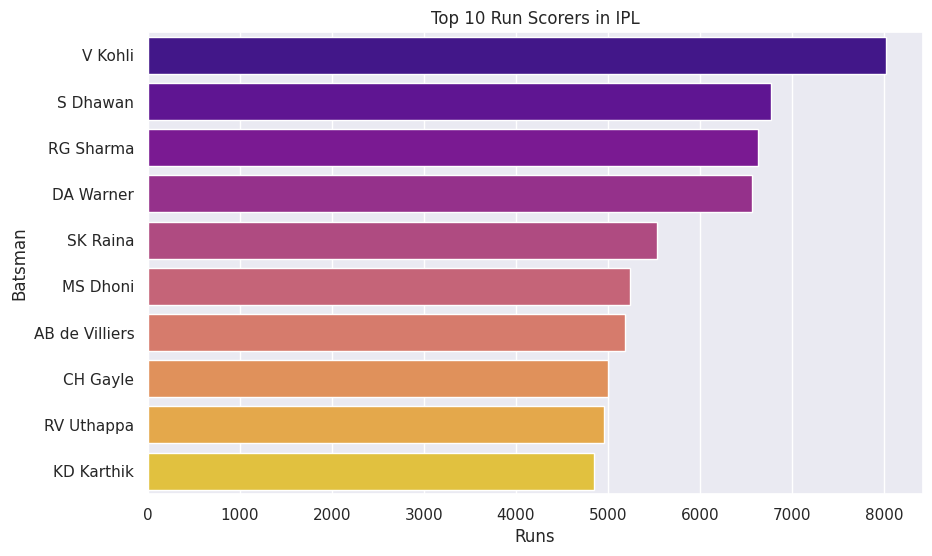

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x = top_batsman.values, y = top_batsman.index, palette= 'plasma', hue=top_batsman.index, legend=False)
plt.title('Top 10 Run Scorers in IPL')
plt.xlabel('Runs')
plt.ylabel('Batsman')
plt.show()

## Top 10 Bowlers By Wickets

In [22]:
valid_dismissals = deliveries[deliveries['dismissal_kind'].isin(['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket'])]
valid_dismissals.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
33,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,5,2,SC Ganguly,Z Khan,BB McCullum,0,0,0,NaN,1,SC Ganguly,caught,JH Kallis
74,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,12,1,RT Ponting,JH Kallis,BB McCullum,0,0,0,NaN,1,RT Ponting,caught,P Kumar


In [23]:
top_bowlers = valid_dismissals['bowler'].value_counts().head(10)
top_bowlers

bowler
YS Chahal     205
PP Chawla     192
DJ Bravo      183
B Kumar       181
SP Narine     180
R Ashwin      180
A Mishra      174
SL Malinga    170
JJ Bumrah     168
RA Jadeja     160
Name: count, dtype: int64

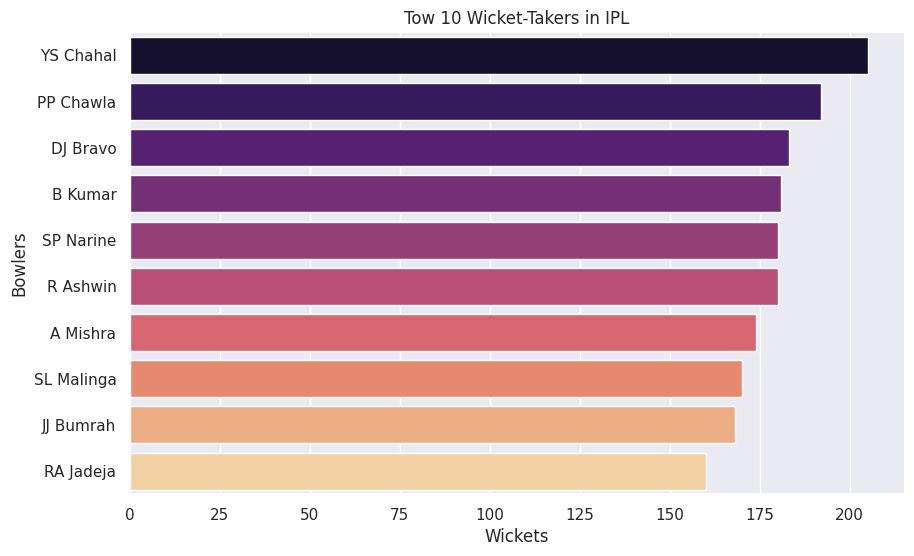

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x = top_bowlers.values, y = top_bowlers.index, hue=top_bowlers.index, palette='magma', legend=False)
plt.title("Tow 10 Wicket-Takers in IPL")
plt.xlabel('Wickets')
plt.ylabel('Bowlers')
plt.show()

## Most Sixes and Fours

In [25]:
sixes = deliveries[deliveries['batsman_runs'] == 6]['batter'].value_counts().head(10)
sixes

batter
CH Gayle          359
RG Sharma         281
V Kohli           273
AB de Villiers    253
MS Dhoni          252
DA Warner         236
KA Pollard        224
AD Russell        209
SV Samson         206
SK Raina          204
Name: count, dtype: int64

In [26]:
fours = deliveries[deliveries['batsman_runs'] == 4]['batter'].value_counts().head(10)
fours

batter
S Dhawan        768
V Kohli         708
DA Warner       663
RG Sharma       599
SK Raina        506
G Gambhir       492
RV Uthappa      481
AM Rahane       479
KD Karthik      466
F du Plessis    422
Name: count, dtype: int64

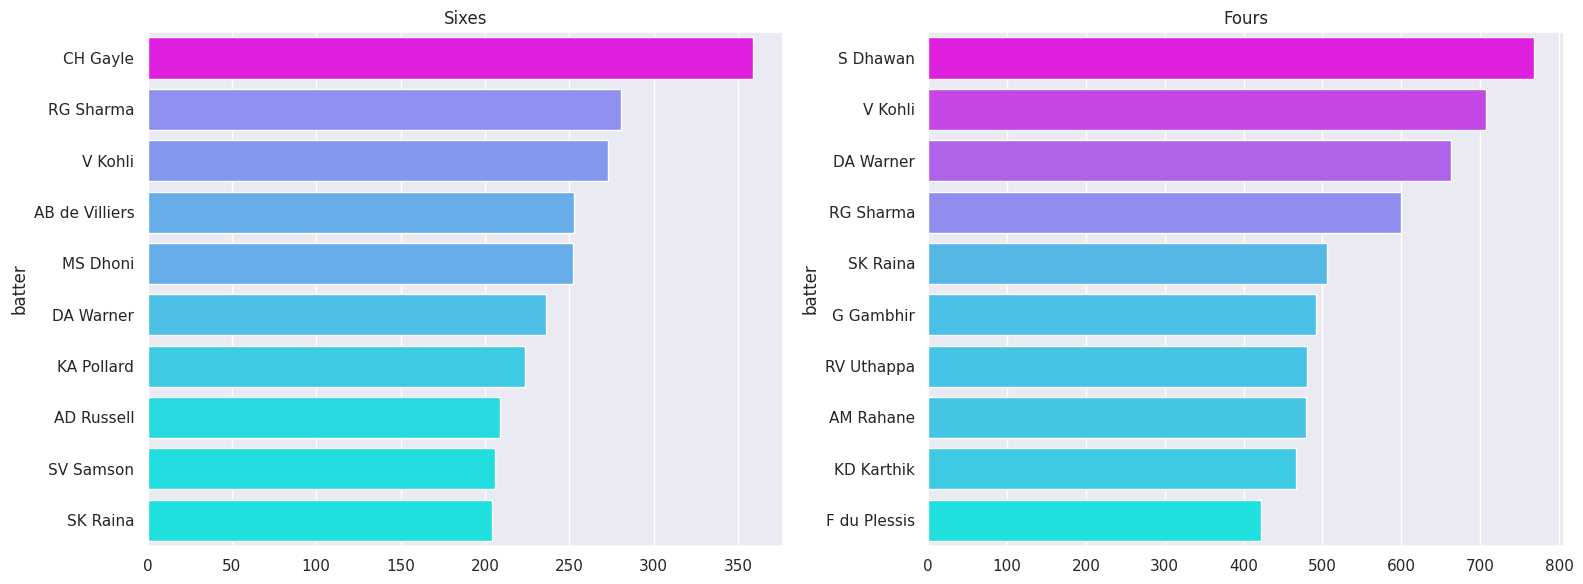

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x=sixes.values, y = sixes.index, ax=ax[0], palette='cool', hue=sixes.values, legend=False)
ax[0].set_title('Top 10 Batsman - Most Sixes')
ax[0].set_title('Sixes')

sns.barplot(x=fours.values, y = fours.index, ax=ax[1], palette='cool', hue=fours.values, legend=False)
ax[1].set_title('Top 10 Batsman - Most Fours')
ax[1].set_title('Fours')

plt.tight_layout()
plt.show()

## Best Strike Rates (Min 500 balls faced)

In [28]:
batsman_data = deliveries.groupby('batter').agg({
    'batsman_runs': 'sum',
    'ball': 'count'
}).rename(columns ={'ball':'ball_faced'})

In [29]:
batsman_data = batsman_data[batsman_data['ball_faced'] > 500]
batsman_data.head()

,batsman_runs,ball_faced
batter,,
A Badoni,634,505
A Symonds,974,781
AB de Villiers,5181,3487
AC Gilchrist,2069,1555
AD Mathews,724,599


In [30]:
batsman_data['strike_rate'] = (batsman_data['batsman_runs'] / batsman_data['ball_faced'])*100
batsman_data['strike_rate']

batter
A Badoni           125.544554
A Symonds          124.711908
AB de Villiers     148.580442
AC Gilchrist       133.054662
AD Mathews         120.868114
                      ...    
WP Saha            123.902027
Y Venugopal Rao    113.872832
YBK Jaiswal        146.757991
YK Pathan          138.046272
Yuvraj Singh       124.784776
Name: strike_rate, Length: 125, dtype: float64

In [31]:
top_sr = batsman_data.sort_values(by='strike_rate', ascending=False).head(10)
top_sr

,batsman_runs,ball_faced,strike_rate
batter,,,
AD Russell,2488,1515,164.224422
H Klaasen,993,613,161.990212
SP Narine,1534,984,155.894309
N Pooran,1769,1143,154.768154
LS Livingstone,939,609,154.187192
GJ Maxwell,2772,1842,150.488599
RM Patidar,799,534,149.625468
Abhishek Sharma,1377,925,148.864865
V Sehwag,2728,1833,148.827059


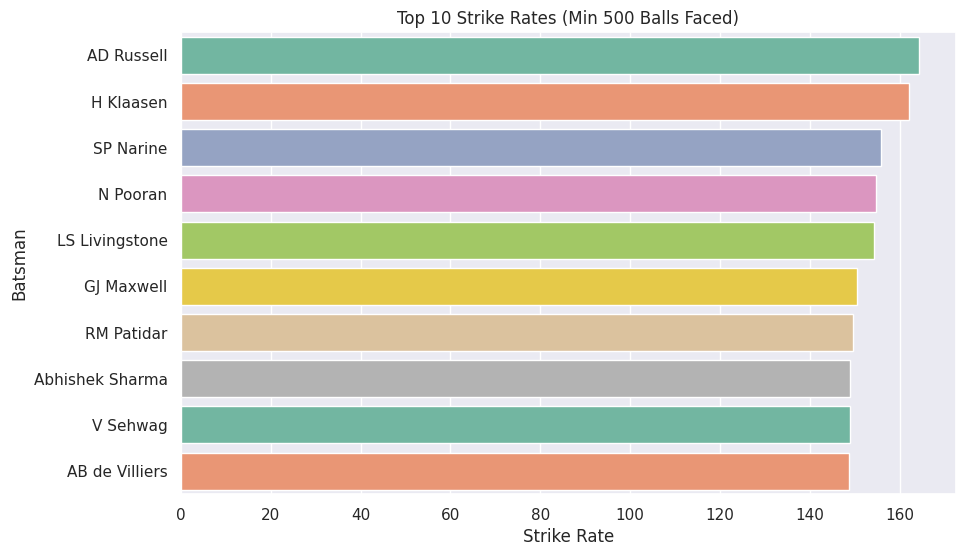

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sr['strike_rate'], y = top_sr.index, palette='Set2', hue=top_sr.index, legend=False)
plt.title('Top 10 Strike Rates (Min 500 Balls Faced)')
plt.xlabel('Strike Rate')
plt.ylabel('Batsman')
plt.show()

## Most Economic Bowlers (Min 300 balls Bowled)

In [33]:
bowler_data = deliveries.groupby('bowler').agg({
    'total_runs': 'sum',
    'ball': 'count'
}).rename(columns ={'ball':'ball_bowled'})

In [34]:
bowler_data = bowler_data[bowler_data['ball_bowled'] >= 300]
bowler_data.head()

,total_runs,ball_bowled
bowler,,
A Kumble,1089,983
A Mishra,4193,3444
A Mithun,477,312
A Nehra,2537,1974
A Nortje,1614,1097


In [35]:
bowler_data['economy'] = (bowler_data['total_runs'] / bowler_data['ball_bowled'])*6
bowler_data['economy']

bowler
A Kumble        6.646999
A Mishra        7.304878
A Mithun        9.173077
A Nehra         7.711246
A Nortje        8.827712
                  ...   
YS Chahal       7.741455
Yash Dayal      9.102439
Yash Thakur     9.750000
Yuvraj Singh    7.421769
Z Khan          7.539543
Name: economy, Length: 196, dtype: float64

In [36]:
top_economy = bowler_data.sort_values(by='economy').head(10)
top_economy

,total_runs,ball_bowled,economy
bowler,,,
A Kumble,1089,983,6.646999
GD McGrath,366,329,6.674772
M Muralitharan,1765,1581,6.698292
J Yadav,447,398,6.738693
SP Narine,4672,4146,6.761216
RE van der Merwe,515,455,6.791209
DW Steyn,2583,2282,6.791411
DL Vettori,894,785,6.833121
Rashid Khan,3340,2901,6.907963


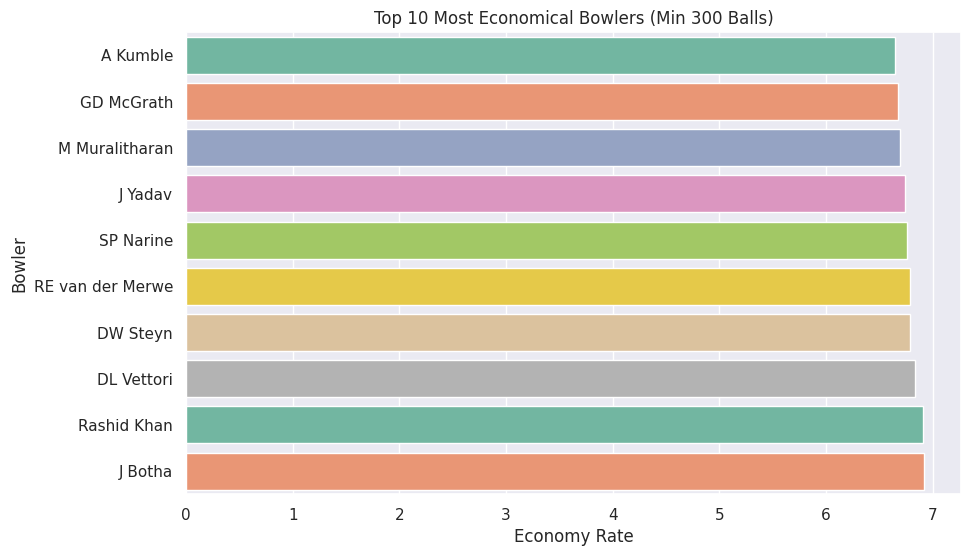

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_economy['economy'], y = top_economy.index, palette='Set2', hue=top_economy.index, legend=False)
plt.title('Top 10 Most Economical Bowlers (Min 300 Balls)')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.show()

## Top Valuable Players

In [38]:
top_mvp = matches['player_of_match'].value_counts().head(10)
top_mvp

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
MS Dhoni          17
SR Watson         16
YK Pathan         16
RA Jadeja         16
AD Russell        15
Name: count, dtype: int64

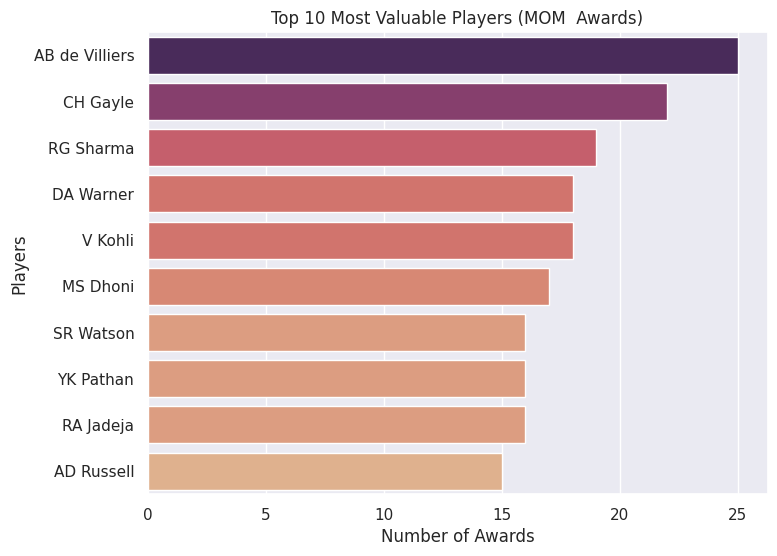

In [39]:
plt.figure(figsize=(8, 6))
sns.barplot(x = top_mvp.values, y = top_mvp.index, palette='flare', hue=top_mvp.values, legend=False)
plt.title('Top 10 Most Valuable Players (MOM  Awards)')
plt.xlabel('Number of Awards')
plt.ylabel('Players')
plt.show()

## Team Performance across Seasons

In [40]:
team_season = matches.groupby(['season', 'winner']).size().reset_index(name='wins')
team_season

,season,winner,wins
0,2007/08,Chennai Super Kings,9
1,2007/08,Deccan Chargers,2
2,2007/08,Delhi Daredevils,7
3,2007/08,Kings XI Punjab,10
4,2007/08,Kolkata Knight Riders,6
...,...,...,...
145,2024,Mumbai Indians,4
146,2024,Punjab Kings,5
147,2024,Rajasthan Royals,9
148,2024,Royal Challengers Bengaluru,7


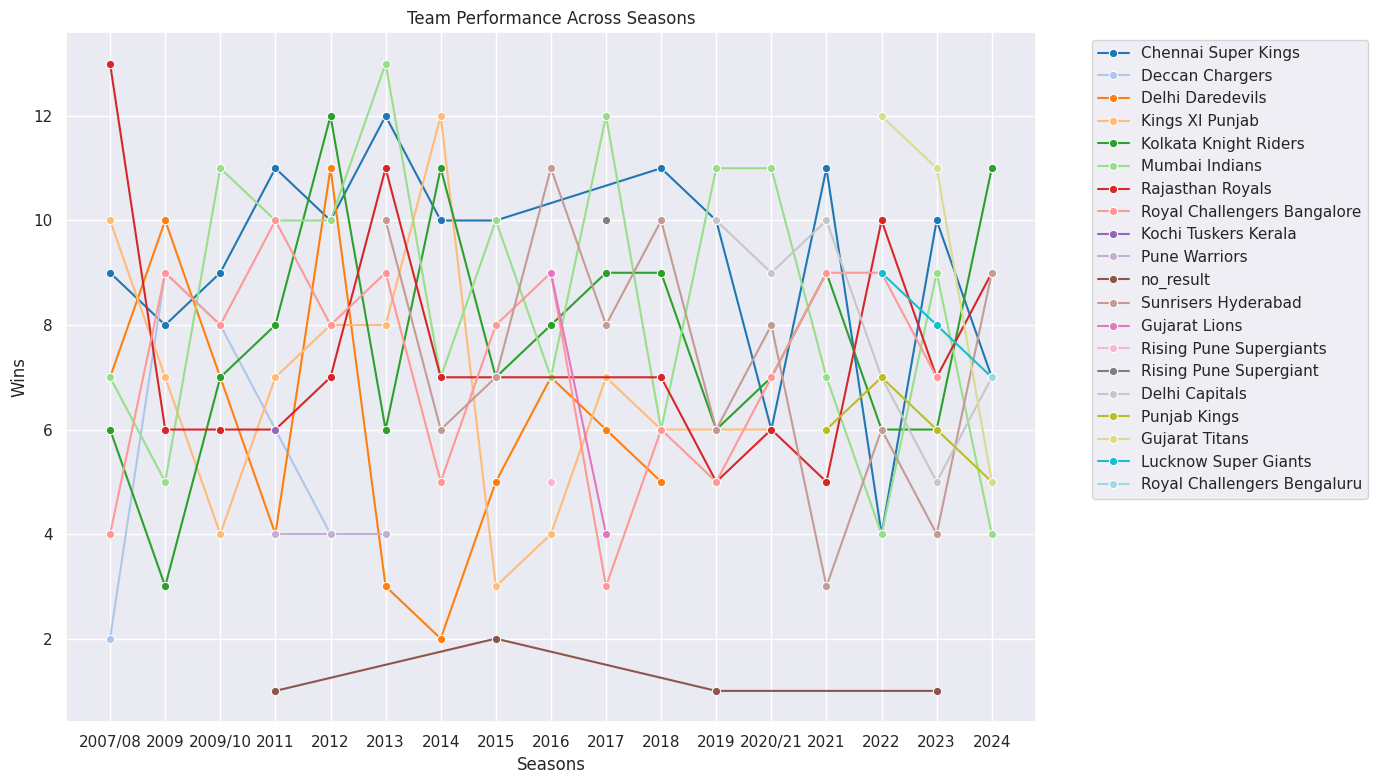

In [41]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=team_season, x = 'season', y = 'wins', hue='winner', marker='o', palette='tab20')
plt.title('Team Performance Across Seasons')
plt.xlabel('Seasons')
plt.ylabel('Wins')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Toss Decision Impact on Match Rsult

In [42]:
matches['toss_win_match_win'] = matches['toss_winner'] == matches['winner']
toss_impact = matches['toss_win_match_win'].value_counts(normalize=True) * 100
toss_impact

toss_win_match_win
True     50.593607
False    49.406393
Name: proportion, dtype: float64

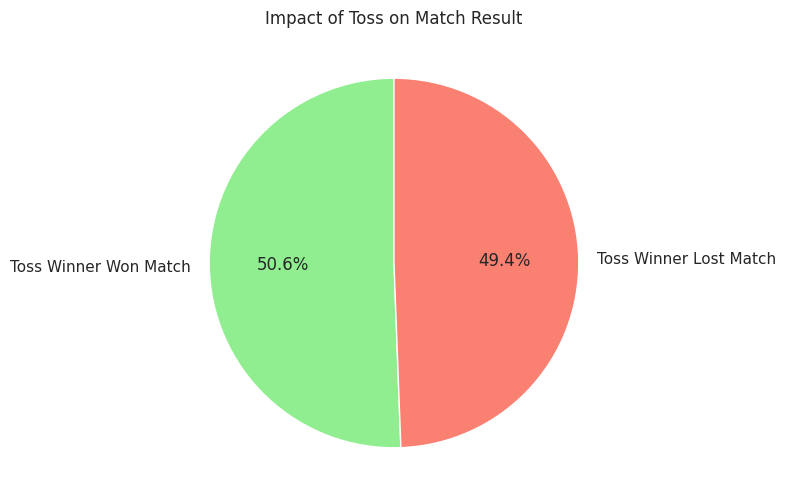

In [43]:
labels = ['Toss Winner Won Match', 'Toss Winner Lost Match']
plt.figure(figsize=(6, 6))
plt.pie(toss_impact, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('Impact of Toss on Match Result')
plt.show()

## Top Batsmen in Death Overs (Overs 16–20)

In [44]:
death_over = deliveries[(deliveries['over'] >= 16) & (deliveries['over'] <=20)]
death_batsman = death_over.groupby('batter')['batsman_runs'].sum().sort_values(ascending= False).head(10)
death_batsman

batter
MS Dhoni          2786
KA Pollard        1708
KD Karthik        1565
AB de Villiers    1421
RA Jadeja         1420
RG Sharma         1176
HH Pandya         1126
V Kohli           1099
AD Russell        1065
DA Miller          988
Name: batsman_runs, dtype: int64

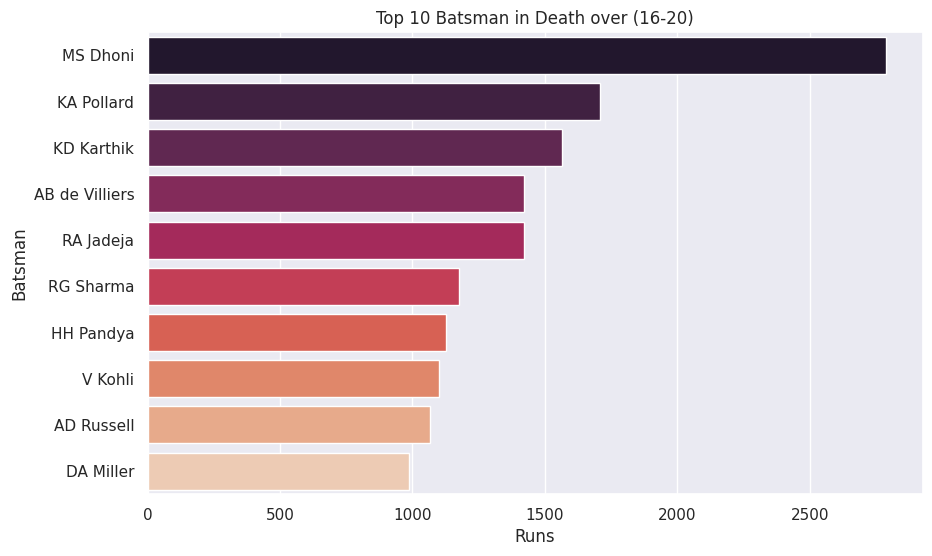

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x = death_batsman.values, y = death_batsman.index, hue=death_batsman.index, palette='rocket', legend=False)
plt.title('Top 10 Batsman in Death over (16-20)')
plt.xlabel('Runs')
plt.ylabel('Batsman')
plt.show()

## Best Bowlers in PowerPlay (overs 1-6)

In [46]:
power_play = deliveries[(deliveries['over'] >= 1) & (deliveries['over'] <= 6)]
pp_wickets = power_play[power_play['dismissal_kind'].isin(['bowled', 'caught', 'lbw', 'stumped', 'hit wicket'])]
pp_wickets.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
33,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,5,2,SC Ganguly,Z Khan,BB McCullum,0,0,0,NaN,1,SC Ganguly,caught,JH Kallis
131,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,I Sharma,W Jaffer,0,0,0,NaN,1,R Dravid,bowled,NaN


In [47]:
pp_top_bowlers = pp_wickets['bowler'].value_counts().head(10)
pp_top_bowlers

bowler
I Sharma          56
UT Yadav          48
Sandeep Sharma    47
DL Chahar         45
R Ashwin          42
B Kumar           42
Z Khan            41
DS Kulkarni       38
Mohammed Shami    37
RP Singh          36
Name: count, dtype: int64

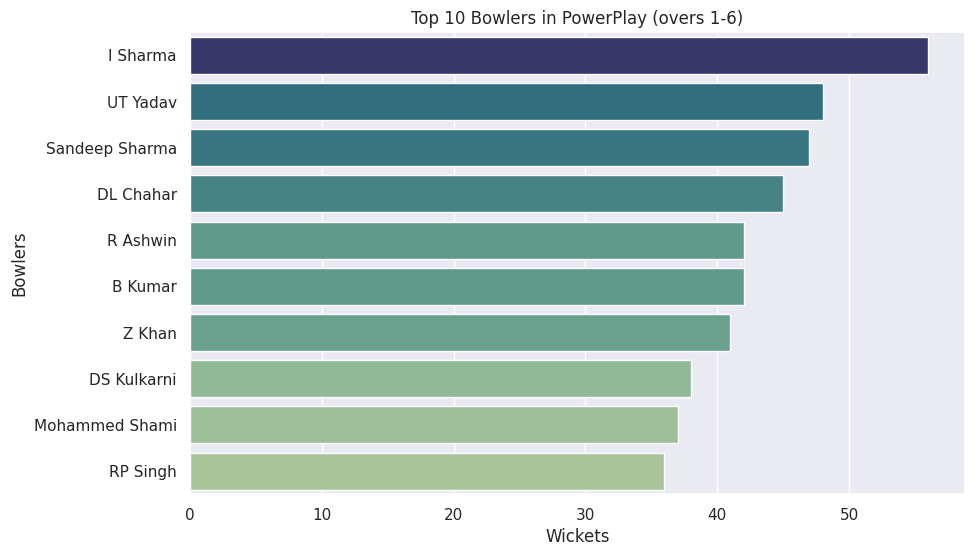

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x = pp_top_bowlers.values, y = pp_top_bowlers.index, palette='crest', hue=pp_top_bowlers.values, legend=False)
plt.title('Top 10 Bowlers in PowerPlay (overs 1-6)')
plt.xlabel('Wickets')
plt.ylabel('Bowlers')
plt.show()

# RCB Analysis

## RCB Overall Wins & Matches

In [49]:
rcb_matches = matches[(matches['team1'] == 'Royal Challengers Bangalore') | (matches['team2'] == 'Royal Challengers Bangalore')]
rcb_matches

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,toss_win_match_win
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,False
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper,False
10,335992,2007/08,Bangalore,2008-04-26,League,SR Watson,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,7.0,136.0,20.0,N,MR Benson,IL Howell,True
14,335996,2007/08,Bangalore,2008-04-28,League,MS Dhoni,M Chinnaswamy Stadium,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13.0,179.0,20.0,N,BR Doctrove,RB Tiffin,True
16,335998,2007/08,Delhi,2008-04-30,League,GD McGrath,Feroz Shah Kotla,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Delhi Daredevils,runs,10.0,192.0,20.0,N,Aleem Dar,I Shivram,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,1359524,2023,Delhi,2023-05-06,League,PD Salt,"Arun Jaitley Stadium, Delhi",Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,Delhi Capitals,wickets,7.0,182.0,20.0,N,RJ Tucker,YC Barde,False
1003,1359528,2023,Mumbai,2023-05-09,League,SA Yadav,"Wankhede Stadium, Mumbai",Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,6.0,200.0,20.0,N,HAS Khalid,VK Sharma,True
1009,1359534,2023,Jaipur,2023-05-14,League,WD Parnell,"Sawai Mansingh Stadium, Jaipur",Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,runs,112.0,172.0,20.0,N,KN Ananthapadmanabhan,Navdeep Singh,True
1014,1359539,2023,Hyderabad,2023-05-18,League,V Kohli,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,187.0,20.0,N,BNJ Oxenford,VK Sharma,True


In [50]:
rcb_wins = rcb_matches[rcb_matches['winner'] == 'Royal Challengers Bangalore'].shape[0]
rcb_wins

116

In [51]:
rcb_total = rcb_matches.shape[0]
rcb_total

240

In [52]:
rcb_loses = rcb_total - rcb_wins
rcb_loses

124

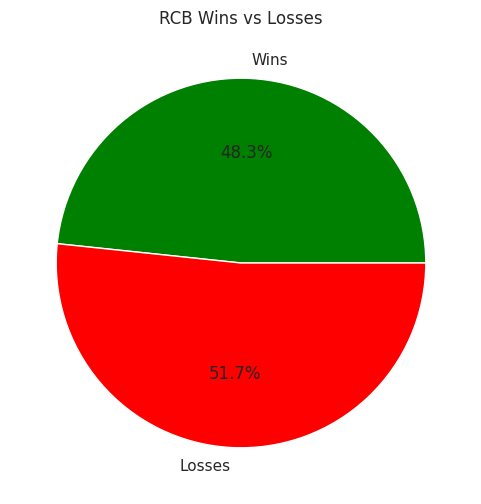

In [53]:
plt.figure(figsize=(6,6))
plt.pie([rcb_wins, rcb_loses], labels=['Wins', 'Losses'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('RCB Wins vs Losses')
plt.show()

## RCB Season-wise Performance

In [54]:
rcb_season = matches[matches['winner'] == 'Royal Challengers Bangalore']['season'].value_counts().sort_index()
rcb_season

season
2007/08     4
2009        9
2009/10     8
2011       10
2012        8
2013        9
2014        5
2015        8
2016        9
2017        3
2018        6
2019        5
2020/21     7
2021        9
2022        9
2023        7
Name: count, dtype: int64

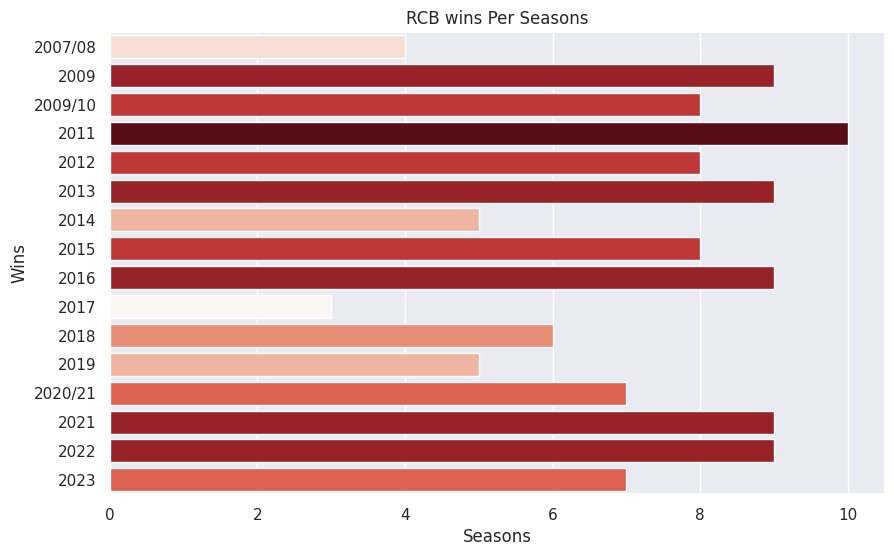

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x = rcb_season.values, y = rcb_season.index, palette='Reds', hue=rcb_season.values, legend=False)
plt.title('RCB wins Per Seasons')
plt.xlabel('Seasons')
plt.ylabel('Wins')
plt.show()

## RCB Favourite Venue

In [56]:
rcb_venue = rcb_matches['venue'].value_counts().head(10)
rcb_venue

venue
M Chinnaswamy Stadium                        61
M.Chinnaswamy Stadium                        15
Dubai International Cricket Stadium          12
Eden Gardens                                 10
Wankhede Stadium                             10
Sharjah Cricket Stadium                       8
MA Chidambaram Stadium, Chepauk               8
Rajiv Gandhi International Stadium, Uppal     8
Feroz Shah Kotla                              7
Sawai Mansingh Stadium                        7
Name: count, dtype: int64

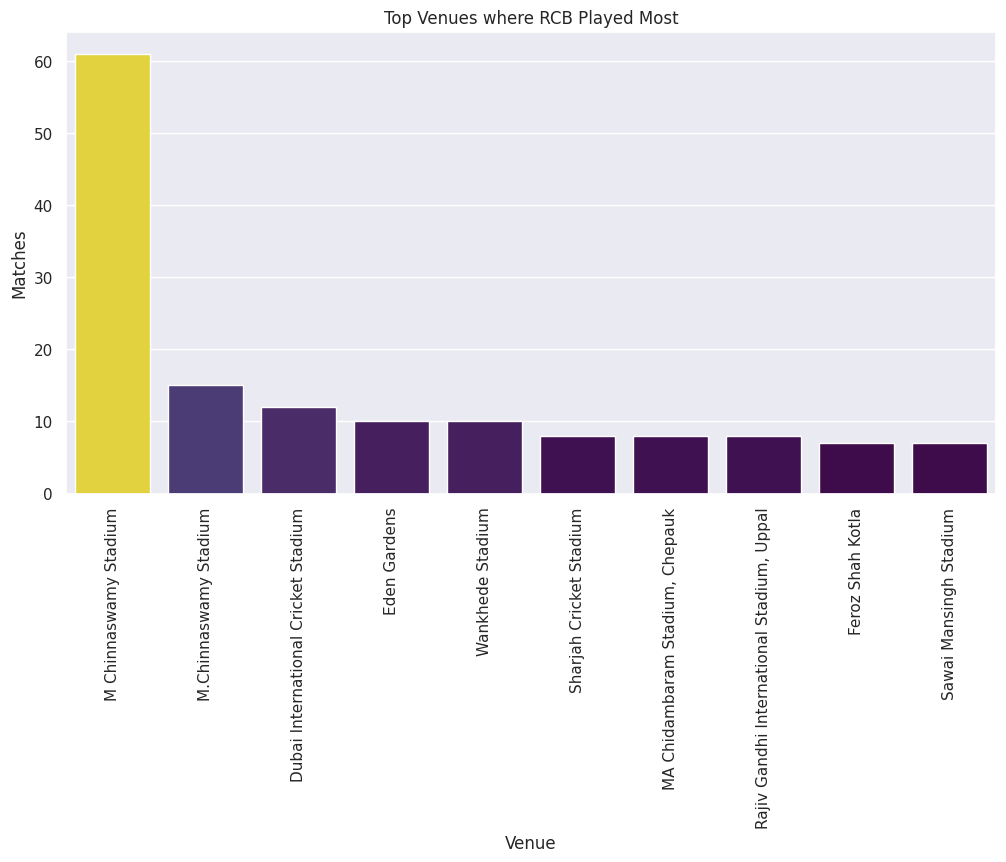

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(y = rcb_venue.values, x = rcb_venue.index, palette='viridis', hue=rcb_venue.values, legend=False)
plt.xlabel('Venue')
plt.xticks(rotation = 90)
plt.ylabel('Matches')
plt.title('Top Venues where RCB Played Most')
plt.show()

## Top RCB Batsman

In [58]:
rcb_batting = deliveries[deliveries['batting_team'] == 'Royal Challengers Bangalore']

In [59]:
top_rcb_batsman = rcb_batting.groupby('batter')['batsman_runs'].sum().sort_values(ascending= False).head(5)
top_rcb_batsman

batter
V Kohli           7273
AB de Villiers    4510
CH Gayle          3175
GJ Maxwell        1214
F du Plessis      1198
Name: batsman_runs, dtype: int64

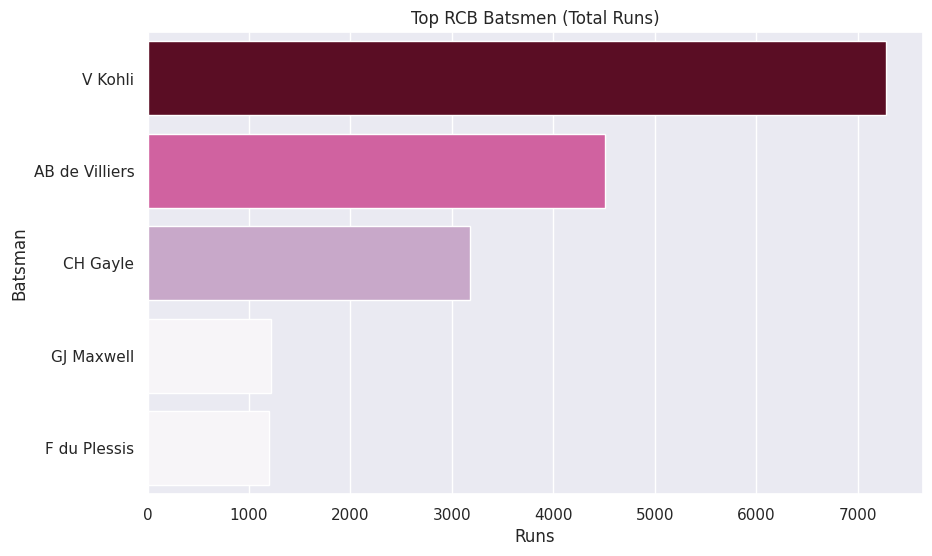

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_rcb_batsman.values, y=top_rcb_batsman.index, palette='PuRd', hue=top_rcb_batsman.values, legend=False)
plt.title('Top RCB Batsmen (Total Runs)')
plt.xlabel('Runs')
plt.ylabel('Batsman')
plt.show()

## Top RCB Bowlers

In [61]:
rcb_bowlings = deliveries[deliveries['bowling_team'] == 'Royal Challengers Bangalore']

In [62]:
rcb_dismissals = rcb_bowlings[rcb_bowlings['dismissal_kind'].isin(['bowled', 'caught', 'lbw', 'stumped', 'hit wicket'])]
rcb_dismissals.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
33,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,5,2,SC Ganguly,Z Khan,BB McCullum,0,0,0,NaN,1,SC Ganguly,caught,JH Kallis
74,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,12,1,RT Ponting,JH Kallis,BB McCullum,0,0,0,NaN,1,RT Ponting,caught,P Kumar


In [63]:
top_rcb_bowlers = rcb_dismissals['bowler'].value_counts().head(5)
top_rcb_bowlers

bowler
YS Chahal         136
HV Patel           97
R Vinay Kumar      69
Mohammed Siraj     67
Z Khan             48
Name: count, dtype: int64

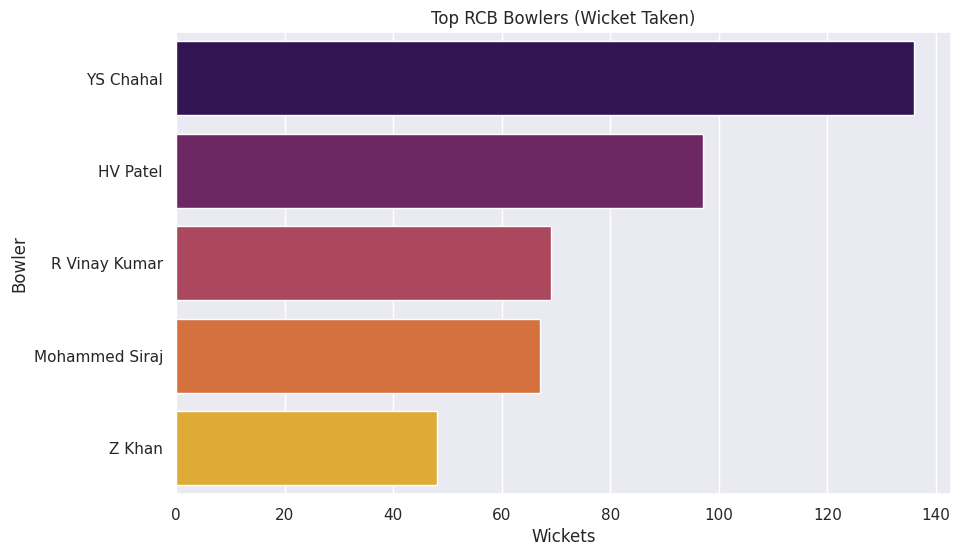

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x = top_rcb_bowlers.values, y = top_rcb_bowlers.index, palette='inferno', hue=top_rcb_bowlers.index, legend=False)
plt.title('Top RCB Bowlers (Wicket Taken)')
plt.xlabel('Wickets')
plt.ylabel('Bowler')
plt.show()

# Analysis RCB win probality

In [65]:
rcb_data = matches[(matches['team1'] == 'Royal Challengers Bangalore') | (matches['team2'] == 'Royal Challengers Bangalore')].copy()
rcb_data.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,toss_win_match_win
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,False
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper,False
10,335992,2007/08,Bangalore,2008-04-26,League,SR Watson,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,7.0,136.0,20.0,N,MR Benson,IL Howell,True
14,335996,2007/08,Bangalore,2008-04-28,League,MS Dhoni,M Chinnaswamy Stadium,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13.0,179.0,20.0,N,BR Doctrove,RB Tiffin,True
16,335998,2007/08,Delhi,2008-04-30,League,GD McGrath,Feroz Shah Kotla,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Delhi Daredevils,runs,10.0,192.0,20.0,N,Aleem Dar,I Shivram,False


In [66]:
rcb_data['rcb_win'] = rcb_data['winner'].apply(lambda x: 1 if x == 'Royal Challengers Bangalore' else 0)
rcb_data['rcb_win']

0       0
3       1
10      0
14      0
16      0
       ..
999     0
1003    0
1009    1
1014    1
1019    0
Name: rcb_win, Length: 240, dtype: int64

In [67]:
rcb_data['opponent_team'] = rcb_data.apply(
    lambda row: row['team2'] if row['team1'] == 'Royal Challengers Bangalore' else row['team1'],
    axis=1
)

In [68]:
rcb_model_df = rcb_data[['season', 'toss_winner', 'toss_decision', 'venue', 'opponent_team', 'rcb_win']]
rcb_model_df

,season,toss_winner,toss_decision,venue,opponent_team,rcb_win
0,2007/08,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Kolkata Knight Riders,0
3,2007/08,Mumbai Indians,bat,Wankhede Stadium,Mumbai Indians,1
10,2007/08,Rajasthan Royals,field,M Chinnaswamy Stadium,Rajasthan Royals,0
14,2007/08,Chennai Super Kings,bat,M Chinnaswamy Stadium,Chennai Super Kings,0
16,2007/08,Royal Challengers Bangalore,field,Feroz Shah Kotla,Delhi Daredevils,0
...,...,...,...,...,...,...
999,2023,Royal Challengers Bangalore,bat,"Arun Jaitley Stadium, Delhi",Delhi Capitals,0
1003,2023,Mumbai Indians,field,"Wankhede Stadium, Mumbai",Mumbai Indians,0
1009,2023,Royal Challengers Bangalore,bat,"Sawai Mansingh Stadium, Jaipur",Rajasthan Royals,1
1014,2023,Royal Challengers Bangalore,field,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Sunrisers Hyderabad,1


In [69]:
rcb_model_df['season'].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023'], dtype=object)

In [70]:
rcb_model_df['season'].replace({
    '2007/08': 2008,
    '2009/10': 2010,
    '2020/21': 2020
}, inplace=True)

/tmp/ipykernel_8158/1498104699.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rcb_model_df['season'].replace({
/tmp/ipykernel_8158/1498104699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rcb_model_df['season'].replace({


In [71]:
rcb_model_df['toss_win'] = rcb_model_df['toss_winner'].apply(lambda x: 1 if x == 'Royal Challengers Bangalore' else 0)
rcb_model_df.drop('toss_winner', axis=1, inplace=True)
rcb_model_df

/tmp/ipykernel_8158/3096186913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rcb_model_df['toss_win'] = rcb_model_df['toss_winner'].apply(lambda x: 1 if x == 'Royal Challengers Bangalore' else 0)
/tmp/ipykernel_8158/3096186913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rcb_model_df.drop('toss_winner', axis=1, inplace=True)


,season,toss_decision,venue,opponent_team,rcb_win,toss_win
0,2008,field,M Chinnaswamy Stadium,Kolkata Knight Riders,0,1
3,2008,bat,Wankhede Stadium,Mumbai Indians,1,0
10,2008,field,M Chinnaswamy Stadium,Rajasthan Royals,0,0
14,2008,bat,M Chinnaswamy Stadium,Chennai Super Kings,0,0
16,2008,field,Feroz Shah Kotla,Delhi Daredevils,0,1
...,...,...,...,...,...,...
999,2023,bat,"Arun Jaitley Stadium, Delhi",Delhi Capitals,0,1
1003,2023,field,"Wankhede Stadium, Mumbai",Mumbai Indians,0,0
1009,2023,bat,"Sawai Mansingh Stadium, Jaipur",Rajasthan Royals,1,1
1014,2023,field,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Sunrisers Hyderabad,1,1


In [72]:
rcb_model_df = pd.get_dummies(rcb_model_df, columns=['venue', 'opponent_team', 'toss_decision'], drop_first=True)
rcb_model_df 

,season,rcb_win,toss_win,"venue_Arun Jaitley Stadium, Delhi","venue_Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow",venue_Brabourne Stadium,"venue_Brabourne Stadium, Mumbai",venue_Dr DY Patil Sports Academy,"venue_Dr DY Patil Sports Academy, Mumbai",venue_Dubai International Cricket Stadium,...,opponent_team_Kolkata Knight Riders,opponent_team_Lucknow Super Giants,opponent_team_Mumbai Indians,opponent_team_Pune Warriors,opponent_team_Punjab Kings,opponent_team_Rajasthan Royals,opponent_team_Rising Pune Supergiant,opponent_team_Rising Pune Supergiants,opponent_team_Sunrisers Hyderabad,toss_decision_field
0,2008,0,1,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,2008,1,0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
10,2008,0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
14,2008,0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16,2008,0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,2023,0,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1003,2023,0,0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1009,2023,1,1,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1014,2023,1,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [73]:
from sklearn.model_selection import train_test_split

X = rcb_model_df.drop('rcb_win', axis=1)
y = rcb_model_df['rcb_win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [75]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
y_pred = model.predict(X_test)

In [77]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.4375
[[12 16]
 [11  9]]
              precision    recall  f1-score   support

           0       0.52      0.43      0.47        28
           1       0.36      0.45      0.40        20

    accuracy                           0.44        48
   macro avg       0.44      0.44      0.44        48
weighted avg       0.45      0.44      0.44        48



In [78]:
sample = pd.DataFrame({
    'season': [2021],
    'toss_win': [1],
}, columns=X.columns).fillna(0)

print("Win Probability:", model.predict_proba(sample)[0][1])

Win Probability: 0.25


/tmp/ipykernel_8158/3207173116.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  }, columns=X.columns).fillna(0)
